Hyperparameter Search 

Kobie Williams 

2/19/2022

Creating K-Nearest Neighbor Classifier and experimenting with searching for the best performing hyperparameters 



In [64]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix

In [65]:
file_link = 'https://drive.google.com/uc?export=download&id=1izidngrqxWsq-1z-AgOcZIpF5F51CRQr'
df = pd.read_csv(file_link) 
df

,Cust ID,Gender,Income,Age,Rentals,Avg Per Visit,Genre,Incidentals
0,1,M,45000,25,32,2.5,Action,Yes
1,2,F,54000,33,12,3.4,Drama,No
2,3,F,32000,20,42,1.6,Comedy,No
3,4,F,59000,70,16,4.2,Drama,Yes
4,5,M,37000,35,25,3.2,Action,Yes
5,6,M,18000,20,29,1.7,Action,No
6,7,F,29000,45,19,3.8,Drama,No
7,8,M,74000,25,31,2.4,Action,Yes
8,9,M,38000,21,18,2.1,Comedy,No
9,10,F,65000,40,21,3.3,Drama,No


In [66]:
df.head(6)

,Cust ID,Gender,Income,Age,Rentals,Avg Per Visit,Genre,Incidentals
0,1,M,45000,25,32,2.5,Action,Yes
1,2,F,54000,33,12,3.4,Drama,No
2,3,F,32000,20,42,1.6,Comedy,No
3,4,F,59000,70,16,4.2,Drama,Yes
4,5,M,37000,35,25,3.2,Action,Yes
5,6,M,18000,20,29,1.7,Action,No


In [67]:
#data or 'X' will include all columns except Cust ID and Incidentals 
X = df[['Gender','Income', 'Age', 'Rentals', 'Avg Per Visit', 'Genre']]
#target label will be incidentals 
y = df[['Incidentals']]

In [68]:
X = pd.get_dummies(X)

In [69]:
X.head()

,Income,Age,Rentals,Avg Per Visit,Gender_F,Gender_M,Genre_Action,Genre_Comedy,Genre_Drama
0,45000,25,32,2.5,0,1,1,0,0
1,54000,33,12,3.4,1,0,0,0,1
2,32000,20,42,1.6,1,0,0,1,0
3,59000,70,16,4.2,1,0,0,0,1
4,37000,35,25,3.2,0,1,1,0,0


In [70]:
  #income Normalization: 
#minimum norm 
min_income = df["Income"].min() 
#maximum norm 
max_income = df["Income"].max() 

  #Rentals Normalization:
#min norm 
min_rental = df["Rentals"].min() 
#max norm
max_rental = df["Rentals"].max() 

  #Age Normalization: 
#min norm 
min_age = df['Age'].min() 
#max norm
max_age = df['Age'].max() 

  #AVG Per Visit Normalization: 
#min norm 
min_avgV = df["Avg Per Visit"].min() 
#max norm 
max_avgV = df["Avg Per Visit"].max() 


In [71]:
df['Income'] = df['Income'].astype(float) 
df.dtypes

Cust ID            int64
Gender            object
Income           float64
Age                int64
Rentals            int64
Avg Per Visit    float64
Genre             object
Incidentals       object
dtype: object

In [72]:
norm_sal = (df['Income'] - min_income) / (max_income - min_income) 
print(norm_sal.head(10)) 

0    0.500000
1    0.602273
2    0.352273
3    0.659091
4    0.409091
5    0.193182
6    0.318182
7    0.829545
8    0.420455
9    0.727273
Name: Income, dtype: float64


In [73]:
#Split data into train/test data 
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state=0) 

In [74]:
#Creating the model 
model = KNeighborsClassifier(n_neighbors=4, metric = 'euclidean') 
model.fit(Xtrain,ytrain) 


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean', n_neighbors=4)

In [75]:
#Creating the y predictor 
ypred = model.predict(Xtest) 
ypred

array(['No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'Yes', 'No'], dtype=object)

In [76]:
#confusion matrix 
cm = confusion_matrix(ytest, ypred) 

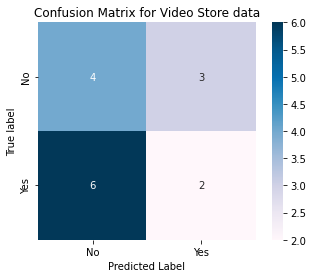

In [77]:
#Creating the confusion matrix heat map 
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap="PuBu", 
            xticklabels=model.classes_, 
            yticklabels=model.classes_) 
plt.xlabel('Predicted Label'); 
plt.ylabel('True label')
plt.title('Confusion Matrix for Video Store data')
plt.show() 

In [78]:
from sklearn.metrics import classification_report 
#Classification Report 
print(classification_report(ytest, ypred)) 

              precision    recall  f1-score   support

          No       0.40      0.57      0.47         7
         Yes       0.40      0.25      0.31         8

    accuracy                           0.40        15
   macro avg       0.40      0.41      0.39        15
weighted avg       0.40      0.40      0.38        15



g) 
i. Precision for the first class (no) was 40% meaning that it was right about the people choosing not to buy the candy or incidentals 

ii. The math for calculating a precision matrix is you divide the true positives by the total amount of positive observations. True positives would be the numerator, and True positives plus false positives is the denominator. 

iii. The recall for the second class is 25%. This is the correct number of positive predictions made compared to the total number of total positive observations. 

iv. The math would be true positives divided by the true positives plus the false negatives. 

v. The overall accuracy was 40% 

vi. The math is the number of true positives plus true negatives divided by the total number of observations. 

In [79]:
#Grid search 
from sklearn.model_selection import GridSearchCV 
gModel = KNeighborsClassifier(n_neighbors=1, metric='euclidean', weights='uniform')
param_grid = {'n_neighbors': np.arange(1,28), 
              'metric': ['euclidean', 'manhattan'], 
              'weights': ['uniform', 'distance']
}

grid = GridSearchCV(gModel, param_grid, cv=5, verbose=1) 

In [80]:
#fitting the grid with our training data 
grid.fit(Xtrain, ytrain)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

GridSearchCV(cv=5,
             estimator=KNeighborsClassifier(metric='euclidean', n_neighbors=1),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [81]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}

In [82]:
bestModel = grid.best_estimator_ 
bestModel.fit(Xtrain, ytrain) 
Ypred = bestModel.predict(Xtest) 
print(classification_report(ytest, Ypred))

              precision    recall  f1-score   support

          No       0.50      0.43      0.46         7
         Yes       0.56      0.62      0.59         8

    accuracy                           0.53        15
   macro avg       0.53      0.53      0.52        15
weighted avg       0.53      0.53      0.53        15



/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


j. This final model did have better precision, recall, and average numbers. The parameters differ between the models because the final one increases the amount of data being used so the variation between the data reduces with the greater amount, thus leading to more accuracy. 
k. If we use the training data to test our model, we should come back with 100 percent accuracy. Because our model is being created off of the training data, it has a great chance of predicting information that it has already seen and has saved in memory.  